## 1. Onde estão os canhotos?
<center>
<img src="https://drive.google.com/uc?id=1jEdTZdnvWaGygP0gdkvhlz9-g6eXzNPv" style="width:800px"> <br> 
<em>Barack Obama assina a Lei de Proteção ao Paciente e Cuidados Acessíveis na Casa Branca, 23 de março , 2010</em></center>

<p>Barack Obama é canhoto. Assim como Bill Gates e Oprah Winfrey; assim como Babe Ruth e Marie Curie. Um <a href="https://www.nejm.org/doi/full/10.1056/NEJM199104043241418">estudo de 1991</a> relatou que os canhotos morrem em média nove anos antes do que os destros. Nove anos! Isso poderia realmente ser verdade? </p>
<p>Neste caderno, exploraremos esse fenômeno usando dados de distribuição de idade para ver se podemos reproduzir uma diferença na idade média no momento da morte puramente a partir das taxas variáveis ​​de canhotos ao longo do tempo, refutando a alegação de morte precoce para canhotos entregadores. Este bloco de anotações usa <code>pandas</code> e estatísticas bayesianas para analisar a probabilidade de morrer com uma certa idade, dado que você é relatado como canhoto ou destro.</p>
<p>Uma pesquisa da National Geographic em 1986 resultou em mais de um milhão de respostas que incluíam idade, sexo e preferência de mão para arremessar e escrever. Os pesquisadores Avery Gilbert e Charles Wysocki analisaram esses dados e notaram que as taxas de canhotos eram de cerca de 13% para pessoas com menos de 40 anos, mas diminuíam com a idade para cerca de 5% aos 80 anos. Eles concluíram com base na análise de um subgrupo de pessoas que jogam com a mão esquerda, mas escrevem com a mão direita, que essa dependência da idade deveu-se principalmente à mudança na aceitabilidade social do canhoto. Isso significa que as taxas não são um fator de <em>idade</em> especificamente, mas sim do <em>ano em que você nasceu</em> e, se o mesmo estudo fosse feito hoje, deveríamos esperar uma mudança versão da mesma distribuição em função da idade. Em última análise, veremos o efeito que essa taxa variável tem sobre a idade média aparente de morte de canhotos, mas vamos começar traçando as taxas de canhotos em função da idade.</p>
<p>Este notebook usa dois conjuntos de dados: <a href="https://www.cdc.gov/nchs/data/statab/vs00199_table310.pdf">dados de distribuição de mortes</a> para os Estados Unidos a partir do ano de 1999 (site de origem <a href="https://www.cdc.gov/nchs/nvss/mortality_tables.htm">aqui</a>) e taxas de canhotos digitalizadas de uma figura neste <a href=" https://www.ncbi.nlm.nih.gov/pubmed/1528408">artigo de 1992 de Gilbert e Wysocki</a>. </p>

Text(0, 0.5, 'Porcentagem de pessoas que são canhotas')

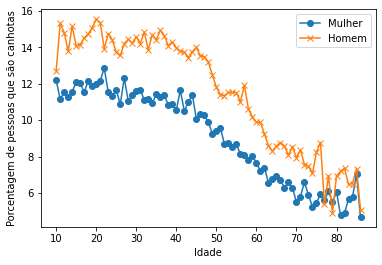

In [ ]:
# Importando bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt

# Carregando os dados
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1, sep = ',')

# plotando a taxas de canhotos do sexo masculino e feminino versus idade
%matplotlib inline
fig, ax = plt.subplots() # criando figura e axis
ax.plot('Age', 'Female', data = lefthanded_data, marker = 'o') # plotando "Female" vs. "Age"
ax.plot('Age', 'Male', data = lefthanded_data, marker = 'x') # plotando "Male" vs. "Age"
ax.legend(['Mulher', 'Homem']) # adicionando a legenda
ax.set_xlabel("Idade")
ax.set_ylabel("Porcentagem de pessoas que são canhotas")

## 2. Taxas de canhotos ao longo do tempo
<p>Vamos converter esses dados em um gráfico das taxas de canhotos em função do ano de nascimento e fazer a média entre homens e mulheres para obter uma taxa única para ambos os sexos. </p>
<p>Como o estudo foi feito em 1986, os dados após esta conversão serão a porcentagem de pessoas vivas em 1986 que são canhotas em função do ano em que nasceram. </p>

Text(0, 0.5, 'Porcentagem de canhotos')

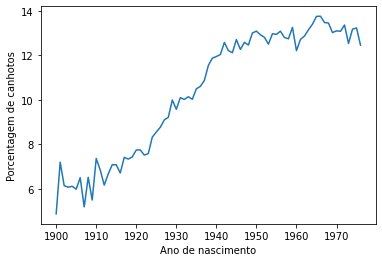

In [ ]:
# criando uma nova coluna para o ano de nascimento de cada idade
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age'] # the study was done in 1986

# criando uma nova coluna para a média de homens e mulheres
lefthanded_data['Mean_lh'] = lefthanded_data[["Female", "Male"]].mean(axis = 1)

# 'Mean_lh' vs. 'Birth_year'

fig, ax = plt.subplots()
ax.plot('Birth_year', 'Mean_lh', data = lefthanded_data) # plotando 'Mean_lh' vs. 'Birth_year'
ax.set_xlabel("Ano de nascimento") 
ax.set_ylabel("Porcentagem de canhotos") 

## 3. Aplicando a regra de Bayes
<p>A probabilidade de morrer em uma certa idade dado que você é canhoto <strong>não</strong> é igual à probabilidade de ser canhoto dado que você morreu em uma certa idade. Essa desigualdade é a razão pela qual precisamos do <strong>teorema de Bayes</strong>, uma declaração sobre probabilidade condicional que nos permite atualizar nossas crenças depois de ver as evidências. </p>
<p>Queremos calcular a probabilidade de morrer na idade 'A' dado que você é canhoto. Vamos escrever isso de forma abreviada como P(A | LH). Também queremos a mesma quantidade para destros: P(A | RH). </p>
<p>Aqui está o teorema de Bayes para os dois eventos que nos interessam: ser canhoto (LH) e morrer na idade A.</p>
<p>$$P(A | LH) = \frac{P(LH|A) P(A)}{P(LH)}$$</p>
<p>P(LH | A) é a probabilidade de você ser canhoto <em>dado que</em> você morreu na idade A. P(A) é a probabilidade geral de morrer na idade A, e P( LH) é a probabilidade geral de ser canhoto. Vamos agora calcular cada uma dessas três quantidades, começando com P(LH | A).</p>
<p>Para calcular P(LH | A) para idades que podem estar fora dos dados originais, precisaremos extrapolar os dados para anos anteriores e posteriores. Como as taxas se nivelaram no início dos anos 1900 e no final dos anos 1900, usaremos alguns pontos em cada extremidade e usaremos a média para extrapolar as taxas em cada extremidade. O número de pontos usados ​​para isso é arbitrário, mas escolheremos 10, pois os dados parecem planos até cerca de 1910. </p>

In [ ]:
# importando biblioteca
import numpy as np

# criando uma função para calcular P(LH | A)
def P_lh_given_A(ages_of_death, study_year = 1990):
    
    # Usando a média dos 10 últimos e 10 primeiros pontos para taxas de canhotos antes e depois do início
    early_1900s_rate = lefthanded_data['Mean_lh'][-10:].mean()
    late_1900s_rate = lefthanded_data['Mean_lh'][:10].mean()
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    youngest_age = study_year - 1986 + 10 # a idade mais jovem é 10
    oldest_age = study_year - 1986 + 86 # a idade mais velha é 86
    
    P_return = np.zeros(ages_of_death.shape) # crie um array vazio para armazenar os resultados
    # extrair taxa de canhotos para pessoas de idades 'ages_of_death'
    P_return[ages_of_death > oldest_age] = early_1900s_rate/ 100
    P_return[ages_of_death < youngest_age] = late_1900s_rate/100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100
    
    return P_return

## 4. Quando as pessoas normalmente morrem?
<p>Para estimar a probabilidade de viver até a idade A, podemos usar dados que fornecem o número de pessoas que morreram em um determinado ano e quantos anos elas tinham para criar uma distribuição de idades de morte. Se normalizarmos os números para o número total de pessoas que morreram, podemos pensar nesses dados como uma distribuição de probabilidade que fornece a probabilidade de morrer na idade A. Os dados que usaremos para isso são de todos os EUA para o ano 1999 - o mais próximo que pude encontrar para o intervalo de tempo em que estamos interessados. </p>
<p>Neste bloco, carregaremos os dados de distribuição de mortes e os plotaremos. A primeira coluna é a idade e as outras colunas são o número de pessoas que morreram nessa idade. </p>

Text(0, 0.5, 'Número de pessoas que morreram')

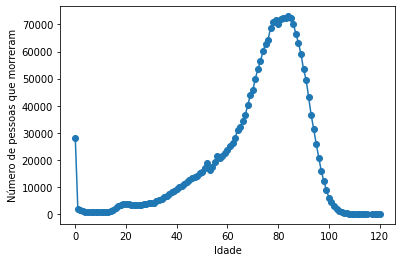

In [ ]:
# Death distribution data for the United States in 1999
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

# load death distribution data
death_distribution_data = pd.read_csv(data_url_2, sep = '\t', skiprows=[1])

# drop NaN values from the `Both Sexes` column
death_distribution_data = death_distribution_data.dropna(subset = ["Both Sexes"]) # drop NaN from'Both Sexes' column

# plot number of people who died as a function of age
fig, ax = plt.subplots()
ax.plot('Age', 'Both Sexes', data = death_distribution_data, marker='o') # plot 'Both Sexes' vs. 'Age'
ax.set_xlabel('Idade') 
ax.set_ylabel('Número de pessoas que morreram')

## 5. A probabilidade geral de ser canhoto
<p>No bloco de código anterior nós carregamos dados para nos dar P(A), e agora precisamos de P(LH). P(LH) é a probabilidade de que uma pessoa que morreu em nosso ano específico de estudo seja canhota, supondo que não saibamos mais nada sobre ela. Esta é a média de canhotos na população de pessoas falecidas, e podemos calculá-la somando todas as probabilidades de canhotos para cada idade, ponderadas com o número de pessoas falecidas em cada idade, depois divididas pelo número total de pessoas falecidas para obter uma probabilidade. Em forma de equação, é isso que estamos calculando, onde N(A) é o número de pessoas que morreram na idade A (dado pelo dataframe <code>death_distribution_data</code>):</p>
<p><img src="https://i.imgur.com/gBIWykY.png" alt="equation" width="220"></p>
<!--- $P(LH) = \frac{\sum_{\text{A}} P(LH | A) N(A)}{\sum_{\text{A}} N(A)} $$ -->

In [ ]:
def P_lh(death_distribution_data, study_year = 1990): #soma sobre P_lh para cada faixa etária
  
    p_list = death_distribution_data['Both Sexes']*P_lh_given_A(death_distribution_data['Age'], study_year)
    p = np.sum(p_list)
    return p/np.sum(death_distribution_data['Both Sexes']) # normalizando para o número total de pessoas na distribuição

print(P_lh(death_distribution_data))

0.07766387615350638


## 6. Juntando tudo: morte sendo canhoto (i)
<p>Agora temos os meios para calcular todas as três quantidades de que precisamos: P(A), P(LH) e P(LH | A). Podemos combinar todos os três usando a regra de Bayes para obter P(A | LH), a probabilidade de morrer na idade A (no ano do estudo), dado que você é canhoto. No entanto, para tornar essa resposta significativa, também queremos compará-la com P(A | RH), a probabilidade de ter a idade A ao morrer, dado que você é destro. </p>
<p>Estamos calculando a seguinte quantidade duas vezes, uma para canhotos e outra para destros.</p>
<p>$$P(A | LH) = \frac{P(LH|A) P(A)}{P(LH)}$$</p>
<p>Primeiro, para canhotos.</p>
<!--Observe que tomei cuidado para não chamá-los de "probabilidade de morrer na idade A", já que não é exatamente isso que estamos calculando: usamos exatamente os mesmos dados de distribuição de morte para cada um. -->

In [ ]:
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    """ A probabilidade geral de ser uma determinada `age_of_death` dado que você é canhoto """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year) # usando a função P_lh para obter a probabilidade geral de ser canhoto
    P_lh_A = P_lh_given_A(ages_of_death, study_year) # usando P_lh_given_A para obter a probabilidade de ser canhoto para uma certa idade
    return P_lh_A*P_A/P_left

## 7. Juntando tudo: morte sendo canhoto (ii)
<p>E agora para destros.</p>

In [ ]:
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    """ A probabilidade geral de ser uma determinada `age_of_death` dado que você é destro """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_right = 1- P_lh(death_distribution_data, study_year) 
    P_rh_A = 1-P_lh_given_A(ages_of_death, study_year)
    return P_rh_A*P_A/P_right

## 8. Plotando as distribuições de probabilidades condicionais
<p>Agora que temos funções para calcular a probabilidade de morte na idade A, dado que você é canhoto ou destro, vamos plotar essas probabilidades para uma faixa de idades de morte de 6 a 120 anos. </p >
<p>Observe que a distribuição de canhotos tem um aumento abaixo dos 70 anos: do grupo de pessoas falecidas, os canhotos têm maior probabilidade de serem mais jovens. </p>

Text(0, 0.5, 'Probabilidade de ter a idade A ao morrer')

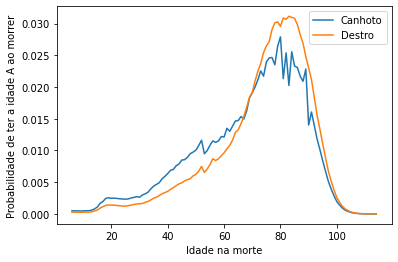

In [ ]:
ages = np.arange(6,115,1) # fazendo uma lista de idades de morte para traçar

left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

fig, ax = plt.subplots()
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = "Right-handed")
ax.legend(['Canhoto','Destro'])
ax.set_xlabel("Idade na morte")
ax.set_ylabel('Probabilidade de ter a idade A ao morrer')

## 9. Momento da verdade: idade dos canhotos e destros na morte
<p>Finalmente, vamos comparar nossos resultados com o estudo original que descobriu que canhotos eram, em média, nove anos mais jovens ao morrer. Podemos fazer isso calculando a média dessas distribuições de probabilidade da mesma forma que calculamos P(LH) anteriormente, ponderando a distribuição de probabilidade por idade e somando o resultado.</p>
<p>$$\text{Idade média dos canhotos no momento da morte} = \sum_A A P(A | LH)$$</p>
<p>$$\text{Idade média dos destros no momento da morte} = \sum_A A P(A | RH)$$</p>

In [ ]:
# calcula as idades médias para grupos de canhotos e destros
average_lh_age =  np.nansum(ages*np.array(left_handed_probability))
average_rh_age =  np.nansum(ages*np.array(right_handed_probability))

# imprime as idades médias de cada grupo
print(round(average_lh_age,1))
print(round(average_rh_age,1))

# imprime a diferença entre as idades médias
print("A diferença entre as idades médias é " + str(round(average_rh_age - average_lh_age, 1)) + " anos.")

67.2
72.8
A diferença entre as idades médias é 5.5 anos.


## 10. Comentários finais
<p>Temos uma grande diferença de idade entre canhotos e destros puramente como resultado das mudanças nas taxas de canhotos na população, o que é uma boa notícia para os canhotos: você provavelmente não morrerá jovem apenas por escrever com a mão esquerda. As taxas relatadas de canhotos aumentaram de apenas 3% no início de 1900 para cerca de 11% hoje, o que significa que as pessoas mais velhas têm muito mais probabilidade de serem relatadas como destras do que canhotas. das pessoas falecidas recentemente terão mais destros idosos.</p>
<p>Nosso número ainda é menor do que o intervalo de 9 anos medido no estudo. É possível que algumas das aproximações que fizemos sejam a causa: </p>
<ol>
<li>Usamos dados de distribuição de óbitos de quase dez anos após o estudo (1999 em vez de 1991) e usamos dados de óbitos de todos os Estados Unidos, em vez apenas da Califórnia (que era o estudo original). </li>
<li>Extrapolamos os resultados da pesquisa de canhotos para grupos de idade mais velhos e mais jovens, mas é possível que nossa extrapolação não tenha chegado perto o suficiente das taxas reais para essas idades. </li>
</ol>
<p>Uma coisa que podemos fazer a seguir é descobrir quanta variabilidade esperamos encontrar na diferença de idade puramente por causa da amostragem aleatória: se você pegar uma amostra menor de pessoas falecidas recentemente e atribuir a lateralidade com as probabilidades da pesquisa, como é essa distribuição? Com que frequência encontraríamos uma diferença de idade de nove anos usando os mesmos dados e suposições? Não faremos isso aqui, mas é possível com esses dados e as ferramentas de amostragem aleatória. </p>
<!-- Fiz isso se quisermos adicionar mais tarefas - provavelmente seriam necessários mais três blocos.-->
<p>Para finalizar, vamos calcular a diferença de idade que esperaríamos se fizéssemos o estudo em 2018 em vez de 1990. A diferença acaba sendo muito menor, pois as taxas de canhotos não aumentaram para pessoas nascidas depois por volta de 1960. Tanto o estudo da National Geographic quanto o estudo de 1990 aconteceram em um momento único - as taxas de canhotos mudaram ao longo da vida da maioria das pessoas vivas, e a diferença na lateralidade entre velhos e jovens era mais impressionante. </p>

In [ ]:
# percorre as idades, calculando a probabilidade de ser canhoto ou destro
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, study_year = 2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, study_year = 2018)
    
# calcula as idades médias para grupos de canhotos e destros
average_lh_age_2018 =  np.nansum(ages*np.array(left_handed_probability_2018))
average_rh_age_2018 =  np.nansum(ages*np.array(right_handed_probability_2018))

print("A diferença entre as idades médias é " + 
      str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " anos.")

A diferença entre as idades médias é 2.3 anos.
